In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv('../Downloads/Training Data/Logistic_X_Train.csv')
df1=pd.read_csv('../Downloads/Training Data/Logistic_Y_Train.csv')
df2=pd.read_csv('../Downloads/Test Cases/Logistic_X_Test.csv')

In [3]:
df.head()

,f1,f2,f3
0,-1.239375,0.749101,-0.528515
1,-1.036070,0.801436,-1.283712
2,-0.615579,1.579521,-1.391927
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603


In [4]:
df1.head()

,label
0,1
1,1
2,1
3,0
4,0


In [5]:
a=np.array(df)
b=np.array(df1)
c=np.array(df2)
print(b.shape,a.shape)

(3000, 1) (3000, 3)


In [6]:
a

array([[-1.23937466,  0.74910149, -0.52851491],
       [-1.03607028,  0.80143631, -1.28371152],
       [-0.61557914,  1.57952053, -1.39192706],
       ...,
       [ 0.08827657,  1.63878904, -2.19364056],
       [ 1.52515501,  0.85923429,  1.50530791],
       [-0.97981744,  0.56395376, -1.53939416]])

C:\Users\KIIT\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


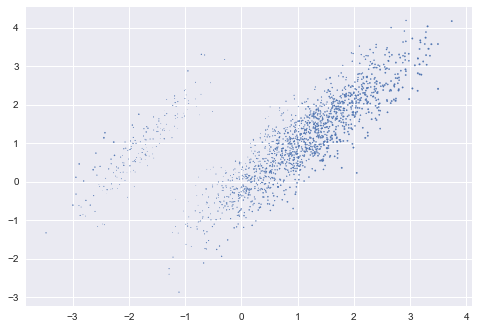

In [7]:
plt.style.use("seaborn")
plt.scatter(a[:,0],a[:,1],a[:,2])
plt.show()

In [8]:
# Data Normalisation
x_mean = a.mean(axis=0)
x_std=a.std(axis=0)

# Apply the Transformation
a=(a-x_mean)/x_std

# Apply the same Transformation 
c=(c-x_mean)/x_std

In [9]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

def hypothesis(X,theta):
    """
    X-entire array(m,n+1)
    theta-np.array(n+1,1)
     """
    return sigmoid(np.dot(X,theta))

def error(X,y,theta):
    """
    parameters:
    x-(m,n+1)
    y-(m,1)
    theta-(n+1,1)
    
    return:scalar_value=loss
    """
    hi=hypothesis(X,theta)
    e=-1*np.mean(y*np.log(hi)+((1-y)*np.log(1-hi)))
    
    return e

In [10]:
def gradient(X,y,theta):
    """
    parameters:
    x-(m,n+1)
    y-(m,1)
    theta-(n+1,1)
    return : gradient_vector=(n+1,1)
    """
    hi=hypothesis(X,theta)
    grad=-np.dot(X.T,(y-hi))
    m=X.shape[0]
    return grad/m

def gradient_descent(X,y,lr=0.1,max_itr=500):
    n=X.shape[1]
    theta=np.zeros((n,1))
    error_list=[]
    for i in range(max_itr):
        err=error(X,y,theta)
        error_list.append(err)
        grad=gradient(X,y,theta)
        #update
        theta=theta-lr*grad
    return (theta,error_list)

In [11]:
theta,error_list=gradient_descent(a,b)

In [12]:
def predict(X,theta):
    h=hypothesis(X,theta)
    output=np.zeros(h.shape)
    output[h>=0.5]=1
    output=output.astype('int')
    return output


In [13]:
Xt_preds=predict(c,theta)

In [14]:
Xt_preds.shape

(1000, 1)

In [15]:
c.shape

(1000, 3)

In [16]:
new=pd.DataFrame(Xt_preds)

In [17]:
new.columns=['label']

In [18]:
new

,label
0,1
1,1
2,0
3,1
4,1
...,...
995,0
996,0
997,1
998,1


In [19]:
new.to_csv('chemicals_output') # Converting the result into a CSV file